In [1]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_bfgs
from sklearn.metrics import accuracy_score
import math
import scipy.io

# Part 1: Loading and Visualizing Data

In [2]:
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)

In [3]:
mat = scipy.io.loadmat('ex3data1.mat')

X = mat['X']
y = mat['y']
y = y.flatten() 
print(X.shape, y.shape)

(5000, 400) (5000,)


In [4]:
m, n = X.shape
rand_indices = np.random.permutation(m)
#rand_indices.shape
sel = X[rand_indices[:100],:]

In [5]:
sel = X[rand_indices[0:100], :]
sel

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
sel.shape

(100, 400)

# Part 2a: Vectorize Logistic Regression

In [7]:
print('\nTesting lrCostFunction() with regularization')


Testing lrCostFunction() with regularization


In [8]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones(5), np.arange(1, 16).reshape((3,5)).T/10]
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3


In [9]:
theta_reg = theta_t[1:]
theta_reg

array([-1,  1,  2])

In [29]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def lrCostFunction(theta, X, y, lambda_):
    
    m = y.shape[0]
    u = lambda_/(2*m)
    t = 1/m
    h = sigmoid(np.dot(np.array(X),np.array(theta.T)))
    theta_reg = theta[1:]
    
    J = t*(np.dot(-y,np.log(h)) - np.dot((1 - y).T,np.log(1 - h))) + u*np.dot(theta_reg, theta_reg)

    theta_reg2 = np.r_[0 , theta_reg]
    grad = t*((X.T * (h - y)).sum(axis=1) + lambda_*theta_reg2)

    return J, grad

In [30]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)


In [31]:
print('\nCost: ', J)
print('Expected cost: 2.534819\n')
print('Gradients:\n')
print(': ', grad)
print('Expected gradients:')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')


Cost:  2.534819396109744
Expected cost: 2.534819

Gradients:

:  [ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003



# Part 2b: One-vs-All Training

In [13]:
from scipy import optimize
from scipy.optimize import minimize

In [14]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.column_stack((np.ones((m,1)), X))
    #options = optimset('GradObj', 'on', 'MaxIter', 50);

    for i in range(num_labels):
        
        initial_theta = np.zeros((n + 1, 1))

        print("Training {:d} out of {:d} categories...".format(i+1, num_labels))

        myargs = (X, (y%10==i).astype(int), lambda_)
        theta = minimize(lrCostFunction, x0=initial_theta, args=myargs,
                         options={'disp': True, 'maxiter':13},
                         method="Newton-CG", jac=True)

        all_theta[i,:] = theta["x"]
    return all_theta

In [15]:
lambda_ = 0.1
num_labels = 10

all_theta = oneVsAll(X, y, num_labels, lambda_)

Training 1 out of 10 categories...
         Current function value: 0.008568
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 302
         Hessian evaluations: 0
Training 2 out of 10 categories...
         Current function value: 0.013401
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 198
         Hessian evaluations: 0
Training 3 out of 10 categories...
         Current function value: 0.050802
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 375
         Hessian evaluations: 0
Training 4 out of 10 categories...
         Current function value: 0.057712
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 370
         Hessian evaluations: 0
Training 5 out of 10 categories...
         Current function value: 0.033282
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 259
         Hessian evalu

# Part 3: Predict for One-Vs-All

In [16]:
def predictOneVsAll(all_theta, X):
    
    m = X.shape[0]
    num_labels = all_theta.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros((m,1), dtype=int)

    X = np.c_[np.ones((m,1)), X].T

    p = np.argmax(sigmoid(np.dot(all_theta,X)), axis=0)
    print(p)
    print(p.shape)
    return p
    
    

In [17]:
predict = predictOneVsAll(all_theta, X)

[0 0 0 ... 9 9 7]
(5000,)


In [18]:
y = y.reshape((y.shape[0],1))
y.shape

(5000, 1)

In [19]:
predict = predict.reshape((y.shape[0],1))

In [20]:
accuracy_score(y, predict)

0.862

# Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks

In [21]:
input_layer_size  = 400   #% 20x20 Input Images of Digits
hidden_layer_size = 25    #% 25 hidden units
num_labels = 10           #% 10 labels, from 1 to 10   
                          #% (note that we have mapped "0" to label 10)

# Part 1: Loading and Visualizing Data

In [22]:
from math import floor, sqrt, ceil


def DisplayData(X, example_width = None):
    
    plt.figure(figsize=(8,8))
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))

    # Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(sqrt(X.shape[1])))

    # Gray Image
    plt.set_cmap("gray")
    
    m, n = X.shape
    
    example_height = int(n / example_width)
    #print("example_height ",example_height)
    # Compute number of items to display
    display_rows = int(ceil(sqrt(m)))
    #print("display_rows ",display_rows)
    display_cols = int(ceil(m / display_rows))
    #print("display_cols ",display_cols)
    # Between images padding
    pad = 1

    # Setup blank display
    s = pad + display_rows * (example_height + pad)
    t = pad + display_cols * (example_width + pad)
    display_array = -np.ones((s,t))
    curr_ex = 0
    
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > m:
                break
            # Copy the patch
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex, :]))
            
            a = pad + j * (example_height + pad) + np.array(range(example_height+1))
            b = pad + i * (example_width + pad) + np.array(range(example_width+1))
            
            display_array[a[0]:a[-1], b[0]:b[-1]] = np.reshape(X[curr_ex, :],
                                                               (example_height, example_width),
                                                               order="F") / max_val
            
            
            curr_ex += 1
            
    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)

    # Do not show axis
    plt.axis('off')
    #plt.show(block=False)
    # display_array
    return h, display_array 
            

(<matplotlib.image.AxesImage at 0x1d6349ebb38>,
 array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        ...,
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]))

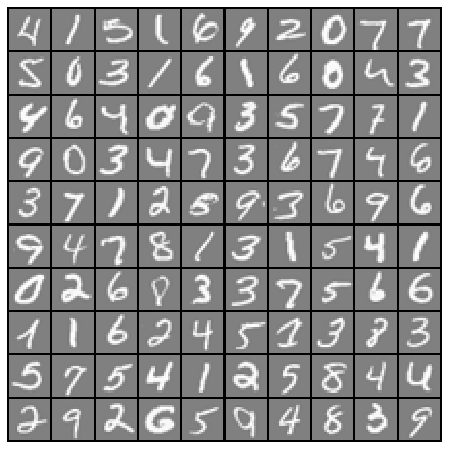

In [23]:
mat = scipy.io.loadmat('ex3data1.mat')

X = mat['X']
y = mat['y']

# Randomly select 100 data points to display
sel = np.random.permutation(X.shape[0]) #randperm(size(X, 1))
sel = sel[:100]

DisplayData(X[sel, :])
#print("X.shape: ",X.shape,"\ny.shape: ", y.shape)


# Part 2: Loading Pameters

In [24]:
print('\nLoading Saved Neural Network Parameters ...\n')

#% Load the weights into variables Theta1 and Theta2
mat = scipy.io.loadmat('ex3weights.mat')
Theta1 = mat["Theta1"]
Theta2 = mat["Theta2"]



Loading Saved Neural Network Parameters ...



# Part 3: Implement Predict

In [25]:
def predict(Theta1, Theta2, X):
    
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    p = np.zeros((m, 1))
    a1 = np.c_[np.ones((m,1)) , X]
    a2 = np.c_[np.ones((m,1)), sigmoid(np.dot(a1,Theta1.T))]
    a3 = sigmoid(np.dot(a2,Theta2.T))

    p = np.argmax(a3, axis=1)
    
    return p+1
    

In [26]:
pred = predict(Theta1, Theta2, X)
pred = pred.reshape((pred.shape[0],1))

#print(pred.shape, y.shape)
print('Training Set Accuracy: {:f}'.format(accuracy_score(pred,y)))


Training Set Accuracy: 0.975200


In [27]:
m = X.shape[0]
rp = np.random.permutation(m)
rp = rp.reshape((m,1))
rp.shape

(5000, 1)

In [32]:
for i in range(m):
    print('\nDisplaying Example Image\n')
    #DisplayData(X[rp[i], :])
    pred = predict(Theta1, Theta2, X[rp[i], :])
    
    print('Neural Network Prediction: {:d} (digit {:d})'.format(pred[0], (pred%10)[0]))
    
    s = input('Program paused. Press enter to continue.\n')
    if s == "q":
        break
    


Displaying Example Image

Neural Network Prediction: 4 (digit 4)
Program paused. Press enter to continue.


Displaying Example Image

Neural Network Prediction: 8 (digit 8)
Program paused. Press enter to continue.


Displaying Example Image

Neural Network Prediction: 1 (digit 1)
Program paused. Press enter to continue.
s

Displaying Example Image

Neural Network Prediction: 10 (digit 0)
Program paused. Press enter to continue.
q
